In [11]:
import autograd.numpy as np
from autograd import grad
from autograd import elementwise_grad
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
%matplotlib inline

nx = 10
dx = 1. / nx
x_space = np.linspace(0, 2, nx)   

In [12]:
#potential field
V1 = np.poly1d([1, 5, 16])

#Total energy
E = 10.0

#to find the roots where E=V, p.r
p = E-V1


def V(x):
    return x*x+5*x+16

#TISE
def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return psy*(E-V(x))

#*2*m/(h*h)

In [13]:
#neural_network
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


In [14]:
# trial function
def psy_trial(xi, net_out):
    return (xi-p.r[0])*(xi-p.r[1])*net_out

psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)

In [15]:
def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

In [16]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001
for i in range(50):
    loss_grad =  grad(loss_function)(W, x_space)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]


In [17]:
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 

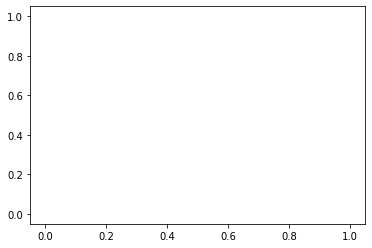

In [18]:
plt.figure()
plt.plot(x_space, res)
plt.show()